In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
nobel=pd.read_csv("Nobel.csv")
print(nobel.head())

   Year    Category                                           Prize  \
0  1901   Chemistry               The Nobel Prize in Chemistry 1901   
1  1901  Literature              The Nobel Prize in Literature 1901   
2  1901    Medicine  The Nobel Prize in Physiology or Medicine 1901   
3  1901       Peace                      The Nobel Peace Prize 1901   
4  1901       Peace                      The Nobel Peace Prize 1901   

                                          Motivation Prize Share  Laureate ID  \
0  "in recognition of the extraordinary services ...         1/1          160   
1  "in special recognition of his poetic composit...         1/1          569   
2  "for his work on serum therapy, especially its...         1/1          293   
3                                                NaN         1/2          462   
4                                                NaN         1/2          463   

  Laureate Type                     Full Name  Birth Date         Birth City  \
0    I

In [8]:
nobel.head() # by default head will show first five lines

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


In [6]:
nobel.tail()# by default tail will show last five lines

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
964,2016,Medicine,The Nobel Prize in Physiology or Medicine 2016,"""for his discoveries of mechanisms for autophagy""",1/1,927,Individual,Yoshinori Ohsumi,1945-02-09,Fukuoka,Japan,Male,Tokyo Institute of Technology,Tokyo,Japan,NaN,NaN,NaN
965,2016,Peace,The Nobel Peace Prize 2016,"""for his resolute efforts to bring the country...",1/1,934,Individual,Juan Manuel Santos,1951-08-10,Bogotá,Colombia,Male,NaN,NaN,NaN,NaN,NaN,NaN
966,2016,Physics,The Nobel Prize in Physics 2016,"""for theoretical discoveries of topological ph...",1/2,928,Individual,David J. Thouless,1934-09-21,Bearsden,United Kingdom,Male,University of Washington,"Seattle, WA",United States of America,NaN,NaN,NaN
967,2016,Physics,The Nobel Prize in Physics 2016,"""for theoretical discoveries of topological ph...",1/4,929,Individual,F. Duncan M. Haldane,1951-09-14,London,United Kingdom,Male,Princeton University,"Princeton, NJ",United States of America,NaN,NaN,NaN
968,2016,Physics,The Nobel Prize in Physics 2016,"""for theoretical discoveries of topological ph...",1/4,930,Individual,J. Michael Kosterlitz,1943-06-22,Aberdeen,United Kingdom,Male,Brown University,"Providence, RI",United States of America,NaN,NaN,NaN


## Which sex and which country most commonly represented

In [12]:
#show no of noble prizes handed
print(len(nobel.Prize))
# showing no of noble prize won by male and female
print(nobel.Sex.value_counts())# value_counts() function is used to get a Series containing counts of unique values in descending order so that the first element is the most frequently occuring.
# show no of prizes won by top 10 countries
nobel['Birth Country'].value_counts().head(10)

969
Male      893
Female     50
Name: Sex, dtype: int64


United States of America    276
United Kingdom               88
Germany                      70
France                       53
Sweden                       30
Japan                        29
Russia                       20
Netherlands                  19
Canada                       18
Italy                        18
Name: Birth Country, dtype: int64

## When did USE started to dominate the Nobel prize chart

#### Becaue in 1901 all winners are from Europe

In [13]:
# Calculating USA born winners per decade
nobel['usa_born_winner'] = nobel['Birth Country'] == 'United States of America'
nobel['decade'] = (np.floor(pd.Series(nobel.Year)/10)*10).astype(int)
prop_usa_winners = nobel.groupby('decade', as_index = False)['usa_born_winner'].mean()

# displaying usa born winners per decade
display(prop_usa_winners)

,decade,usa_born_winner
0,1900,0.017241
1,1910,0.075000
2,1920,0.074074
3,1930,0.241935
4,1940,0.288889
5,1950,0.278481
6,1960,0.262500
7,1970,0.308411
8,1980,0.313131
9,1990,0.392523


#### From table it is only giving a rough idea but to actually see when USA started to dominate we need a plot

## Visualizing USA Dominance

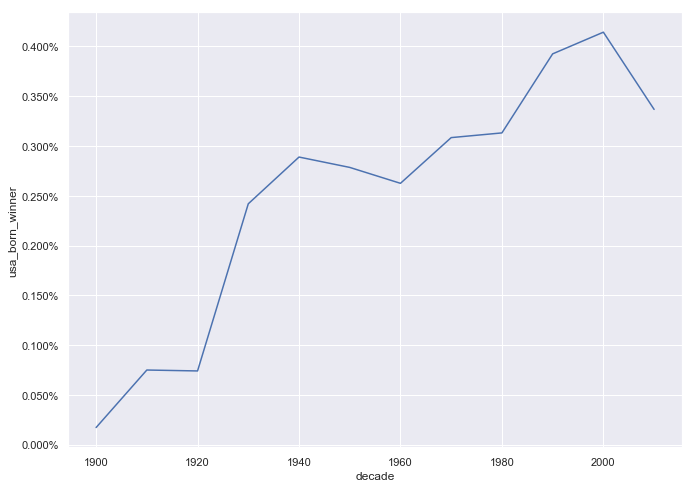

In [14]:
sns.set()

plt.rcParams['figure.figsize'] = [11,8]

#Plotting line plot for USA born winners
ax = sns.lineplot(prop_usa_winners['decade'],prop_usa_winners['usa_born_winner'])

# Adding %-formatting to the y- axis
from matplotlib.ticker import PercentFormatter
ax.yaxis.set_major_formatter(PercentFormatter())

## Gender of Typical Nobel Prize Winners

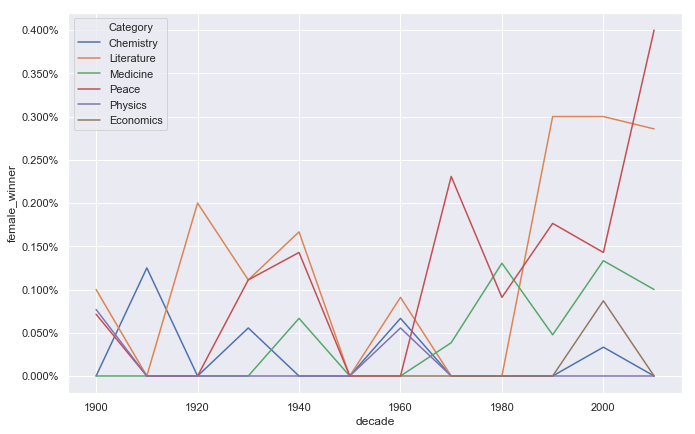

In [15]:
# Calculating the proportion of female laureates per decade
nobel['female_winner'] = nobel.Sex == "Female"
prop_female_winners = nobel.groupby(['decade','Category'],as_index=False)['female_winner'].mean()

# Plotting USA born winners with % winners on the y-axis

# Setting the plotting theme
sns.set()
# and setting the size of all plots.
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [11, 7]

# Plotting USA born winners 
ax = sns.lineplot(x='decade', y='female_winner', hue='Category', data=prop_female_winners)
# Adding %-formatting to the y-axis
from matplotlib.ticker import PercentFormatter
ax.yaxis.set_major_formatter(PercentFormatter())

## First woman to win Nobel Prize and in what category

In [16]:
nobel[nobel['Sex'] == 'Female'].nsmallest(1,'Year',keep='first')

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,...,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country,usa_born_winner,decade,female_winner
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,Female,NaN,NaN,NaN,1934-07-04,Sallanches,France,False,1900,True


## Repeating Laureates

In [17]:
nobel.groupby("Full Name").filter(lambda x: len(x) >= 2)['Full Name'].value_counts()

Comité international de la Croix Rouge (International Committee of the Red Cross)    3
Jack W. Szostak                                                                      3
Theodor W. Hänsch                                                                    2
Carl Bosch                                                                           2
John Bardeen                                                                         2
Charles Kuen Kao                                                                     2
Barry J. Marshall                                                                    2
Abdus Salam                                                                          2
Toshihide Maskawa                                                                    2
Fritz Albert Lipmann                                                                 2
David J. Wineland                                                                    2
Isamu Akasaki                              

## Plotting Age of Nobel Prize Winners when they won prize

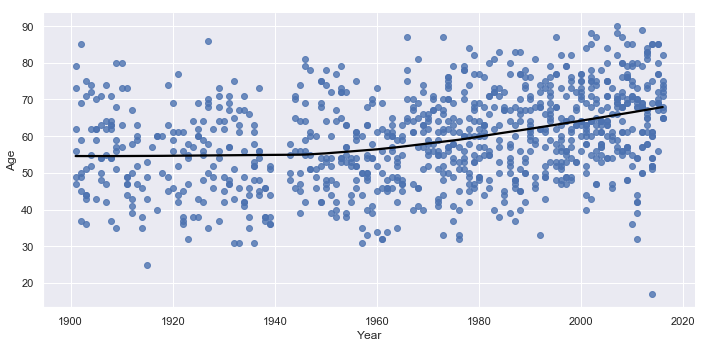

In [18]:
# Converting birth_date from String to datetime
nobel['Birth Date'] = pd.to_datetime(nobel["Birth Date"],errors='coerce')
# Calculating the age of Nobel Prize winners
nobel['Age'] = nobel['Year'] - nobel['Birth Date'].dt.year

# Plotting the age of Nobel Prize winners

sns.lmplot(x='Year',y='Age',data=nobel, lowess=True, aspect=2, line_kws={"color" : "black"})

## Let's look at age trends within different prize categories.

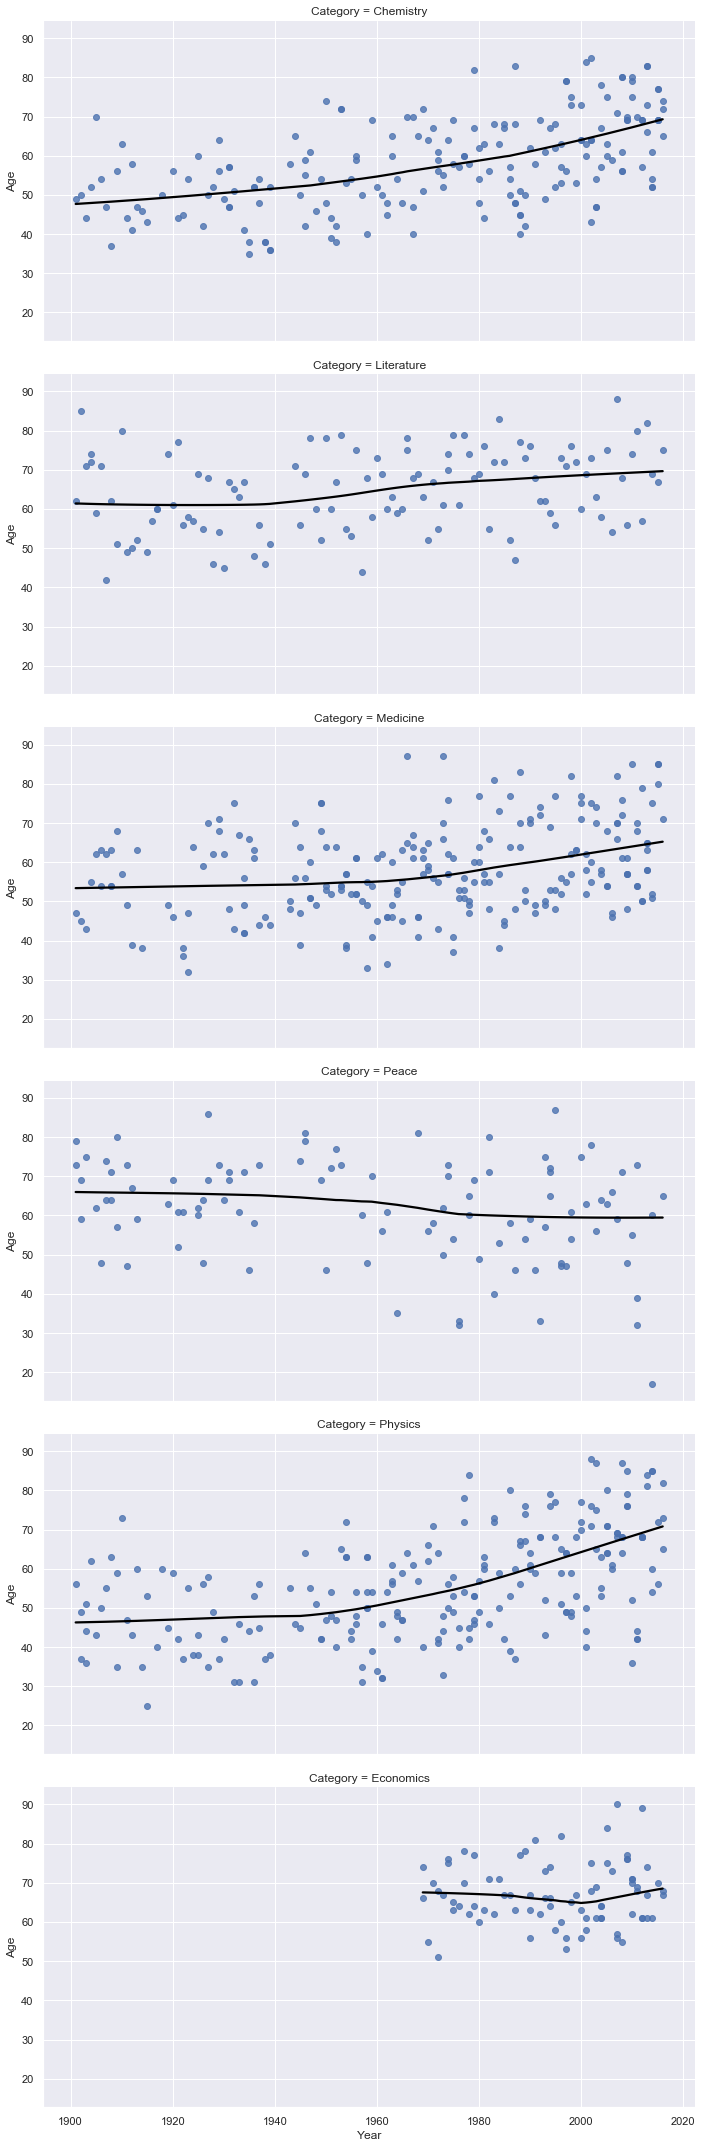

In [20]:
sns.lmplot(x='Year',y='Age',data=nobel, lowess=True, aspect=2, line_kws={"color" : "black"},row='Category')

## Oldest and Youngest Nobel Prize winners

In [21]:
# The oldest winner of a Nobel Prize as of 2016
display(nobel.nlargest(1, "Age"))

# The youngest winner of a Nobel Prize as of 2016
nobel.nsmallest(1, "Age")

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,...,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country,usa_born_winner,decade,female_winner,Age
825,2007,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having laid the foundations of mechanism ...",1/3,820,Individual,Leonid Hurwicz,1917-08-21,Moscow,...,University of Minnesota,"Minneapolis, MN",United States of America,2008-06-24,"Minneapolis, MN",United States of America,False,2000,False,90.0


,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,...,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country,usa_born_winner,decade,female_winner,Age
940,2014,Peace,The Nobel Peace Prize 2014,"""for their struggle against the suppression of...",1/2,914,Individual,Malala Yousafzai,1997-07-12,Mingora,...,NaN,NaN,NaN,NaN,NaN,NaN,False,2010,True,17.0
